In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from scipy.stats import pearsonr

In [2]:
# path to dataframes
path_to_dfs = "data/BLAR_implementation/Block_0103/forecasted_counts/"

In [3]:
# os.listdir(path_to_dfs)

In [4]:
len(os.listdir(path_to_dfs))

6371

In [5]:
6370/910

7.0

In [6]:
# seems each sub-window sequence have 7 things stored - what are all these?

# the forecasted npy files
# ar_sigma
# noise_sigma
# betas
# rho
# averaged forecasts
# posterior parameter summaries - might need to pay a little attention here, the r_hat values are too high - think this should vary around 1? - but almost all the values are greater than 2.

In [7]:
averaged_forecasts_csvs = []
for file in os.listdir(path_to_dfs):
    if file[:8] =='averaged':
        averaged_forecasts_csvs.append(file)

In [8]:
# how many csv files do we have?
len(averaged_forecasts_csvs)

910

In [9]:
# averaged_forecasts_csvs - we probably need these in order for getting the respective predicted values

In [10]:
averaged_forecasts_csvs[0]

'averaged_forecasts_sub_653.csv'

In [11]:
# sorting them would not work as everything in the nomenclature of the files is a character - hence will not respect the numerical order

In [12]:
# let's create these names in the order of the subwindows
ordered_csv_files = ['averaged_forecasts_sub_' + str(i) + '.csv' for i in range(910)]

In [13]:
# ordered_csv_files

In [14]:
# averaged_forecasts_csvs list is pointless at this time?

In [15]:
%%time
all_dfs = []
for file in ordered_csv_files:
    read_df = pd.read_csv(path_to_dfs + '/' + file)
    all_dfs.append(read_df)

CPU times: user 473 ms, sys: 11.4 ms, total: 484 ms
Wall time: 486 ms


In [16]:
# make a single dataframe out of the many
combined_df = pd.concat(all_dfs, axis = 1)

In [17]:
combined_df.head()

,True_value,Forecasted_value,True_value,Forecasted_value,True_value,Forecasted_value,True_value,Forecasted_value,True_value,Forecasted_value,...,True_value,Forecasted_value,True_value,Forecasted_value,True_value,Forecasted_value,True_value,Forecasted_value,True_value,Forecasted_value
0,0.0,-0.007279,0.0,0.001342,0.0,-0.014463,0.0,-0.006619,0.000005,-0.006840,...,0.0,-0.009194,0.0,-0.024609,0.0,-0.013291,0.0,0.006175,0.0,0.015136
1,0.0,-0.007449,0.0,-0.004507,0.0,-0.004461,0.0,0.010723,0.064341,0.000068,...,0.0,-0.003731,0.0,-0.000618,0.0,-0.000924,0.0,0.003867,0.0,0.005072
2,0.0,-0.005981,0.0,-0.007174,0.0,-0.000400,0.0,0.004464,0.000000,-0.001827,...,0.0,-0.008060,0.0,-0.010582,0.0,-0.002664,0.0,-0.015471,0.0,-0.003901
3,0.0,-0.005447,0.0,-0.006824,0.0,0.011465,0.0,0.021764,0.000000,0.001272,...,0.0,-0.004274,0.0,0.013196,0.0,0.003368,0.0,-0.002275,0.0,0.011471
4,0.0,-0.006981,0.0,-0.006054,0.0,0.004548,0.0,-0.011085,0.000000,0.002165,...,0.0,-0.001649,0.0,0.007829,0.0,0.003785,0.0,-0.009859,0.0,0.004498


In [18]:
combined_df.shape

(7, 1820)

In [19]:
# get the true values
True_values_df = combined_df[['True_value']]

In [20]:
True_values_df.head()

,True_value,True_value,True_value,True_value,True_value,True_value,True_value,True_value,True_value,True_value,...,True_value,True_value,True_value,True_value,True_value,True_value,True_value,True_value,True_value,True_value
0,0.0,0.0,0.0,0.0,0.000005,0.000668,1.044816e-07,0.0,0.0,0.0,...,0.0,0.000000e+00,0.000000,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.064341,0.087708,0.000000e+00,0.0,0.0,0.0,...,0.0,0.000000e+00,0.000000,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.000000,0.042056,1.144163e-02,0.0,0.0,0.0,...,0.0,7.683623e-10,0.000005,4.013955e-08,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000e+00,0.0,0.0,0.0,...,0.0,2.402785e-05,0.000649,8.526243e-09,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000e+00,0.0,0.0,0.0,...,0.0,7.268980e-04,0.003864,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0


In [21]:
True_values_df.shape

(7, 910)

In [22]:
# get the proper counts?
exp_true = np.exp(True_values_df)-1

In [23]:
exp_true

,True_value,True_value,True_value,True_value,True_value,True_value,True_value,True_value,True_value,True_value,...,True_value,True_value,True_value,True_value,True_value,True_value,True_value,True_value,True_value,True_value
0,0.0,0.0,0.0,0.0,5.458158e-06,0.000668,1.044816e-07,0.0,0.0,0.0,...,0.000000,0.000000e+00,0.000000,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,6.645597e-02,0.091669,0.000000e+00,0.0,0.0,0.0,...,0.000000,0.000000e+00,0.000000,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.000000e+00,0.042952,1.150733e-02,0.0,0.0,0.0,...,0.000000,7.683623e-10,0.000005,4.013955e-08,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.000000e+00,0.000000,0.000000e+00,0.0,0.0,0.0,...,0.000000,2.402814e-05,0.000650,8.526243e-09,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.000000e+00,0.000000,0.000000e+00,0.0,0.0,0.0,...,0.000000,7.271623e-04,0.003871,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,6.876971e-07,0.022043,5.086000e-04,0.0,0.0,0.0,...,0.000000,2.217396e-03,0.005884,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0,0.000000e+00,0.000000,0.000000e+00,0.0,0.0,0.0,...,0.022043,9.133409e-06,0.054010,4.412074e-04,0.0,0.0,0.0,0.0,0.0,0.0


In [24]:
# sum the true values - since the sub images are not overlapping, we can get the sum across columns in the above dataframe
sum_true_values = exp_true.sum(axis = 1)

In [25]:
sum_true_values

0    40.000661
1    39.000002
2    41.000000
3    31.000000
4    32.000000
5    40.002086
6    27.000176
dtype: float64

In [26]:
# get the forecasted values
Forecasted_values_df = combined_df[['Forecasted_value']]

In [27]:
Forecasted_values_df.head()

,Forecasted_value,Forecasted_value,Forecasted_value,Forecasted_value,Forecasted_value,Forecasted_value,Forecasted_value,Forecasted_value,Forecasted_value,Forecasted_value,...,Forecasted_value,Forecasted_value,Forecasted_value,Forecasted_value,Forecasted_value,Forecasted_value,Forecasted_value,Forecasted_value,Forecasted_value,Forecasted_value
0,-0.007279,0.001342,-0.014463,-0.006619,-0.006840,0.088145,0.042620,0.047033,-0.007805,-0.005963,...,-0.024253,0.024533,-0.006370,0.011137,0.006874,-0.009194,-0.024609,-0.013291,0.006175,0.015136
1,-0.007449,-0.004507,-0.004461,0.010723,0.000068,0.085915,0.043575,0.048003,0.001213,-0.007135,...,-0.014604,0.015365,-0.002497,0.021797,0.000212,-0.003731,-0.000618,-0.000924,0.003867,0.005072
2,-0.005981,-0.007174,-0.000400,0.004464,-0.001827,0.088339,0.054926,0.038742,-0.005458,-0.007781,...,-0.012879,0.020280,0.012899,0.001947,-0.004645,-0.008060,-0.010582,-0.002664,-0.015471,-0.003901
3,-0.005447,-0.006824,0.011465,0.021764,0.001272,0.094239,0.046275,0.045754,0.011134,-0.000019,...,-0.012375,-0.001422,-0.018756,-0.013938,-0.003431,-0.004274,0.013196,0.003368,-0.002275,0.011471
4,-0.006981,-0.006054,0.004548,-0.011085,0.002165,0.095762,0.043703,0.026896,-0.000243,-0.000138,...,0.009112,-0.000789,-0.014065,-0.003231,0.009677,-0.001649,0.007829,0.003785,-0.009859,0.004498


In [28]:
exp_forecasted = np.exp(Forecasted_values_df)-1

In [29]:
exp_forecasted

,Forecasted_value,Forecasted_value,Forecasted_value,Forecasted_value,Forecasted_value,Forecasted_value,Forecasted_value,Forecasted_value,Forecasted_value,Forecasted_value,...,Forecasted_value,Forecasted_value,Forecasted_value,Forecasted_value,Forecasted_value,Forecasted_value,Forecasted_value,Forecasted_value,Forecasted_value,Forecasted_value
0,-0.007252,0.001343,-0.014359,-0.006597,-0.006817,0.092146,0.043541,0.048157,-0.007774,-0.005945,...,-0.023962,0.024836,-0.006349,0.011199,0.006897,-0.009152,-0.024308,-0.013203,0.006194,0.015251
1,-0.007421,-0.004497,-0.004451,0.010781,0.000068,0.089714,0.044538,0.049174,0.001214,-0.007110,...,-0.014498,0.015484,-0.002493,0.022036,0.000212,-0.003724,-0.000618,-0.000923,0.003874,0.005084
2,-0.005963,-0.007148,-0.000399,0.004474,-0.001825,0.092359,0.056463,0.039503,-0.005444,-0.007751,...,-0.012796,0.020487,0.012983,0.001949,-0.004634,-0.008027,-0.010526,-0.002661,-0.015352,-0.003893
3,-0.005433,-0.006801,0.011531,0.022003,0.001273,0.098823,0.047362,0.046817,0.011196,-0.000019,...,-0.012299,-0.001421,-0.018581,-0.013841,-0.003425,-0.004265,0.013283,0.003374,-0.002272,0.011537
4,-0.006957,-0.006035,0.004559,-0.011023,0.002167,0.100497,0.044672,0.027261,-0.000243,-0.000138,...,0.009153,-0.000789,-0.013966,-0.003226,0.009724,-0.001647,0.007859,0.003793,-0.009811,0.004508
5,-0.007444,-0.004530,0.011690,0.021509,0.005045,0.086280,0.052963,0.054324,0.012549,0.001055,...,0.001220,0.022711,-0.003942,-0.000495,0.002177,0.003091,0.015116,0.002837,-0.008281,0.005110
6,-0.003107,0.001370,0.001051,-0.003809,-0.001143,0.093094,0.044940,0.036110,0.006847,0.002905,...,-0.000886,0.007573,-0.006090,-0.005523,-0.007963,0.003282,0.007492,0.000780,-0.005888,0.003280


In [30]:
# set the values to 0 if the forecasted count is negative?

In [31]:
exp_forecasted[exp_forecasted < 0] = 0

In [32]:
exp_forecasted.head()

,Forecasted_value,Forecasted_value,Forecasted_value,Forecasted_value,Forecasted_value,Forecasted_value,Forecasted_value,Forecasted_value,Forecasted_value,Forecasted_value,...,Forecasted_value,Forecasted_value,Forecasted_value,Forecasted_value,Forecasted_value,Forecasted_value,Forecasted_value,Forecasted_value,Forecasted_value,Forecasted_value
0,0.0,0.001343,0.000000,0.000000,0.000000,0.092146,0.043541,0.048157,0.000000,0.0,...,0.000000,0.024836,0.000000,0.011199,0.006897,0.0,0.000000,0.000000,0.006194,0.015251
1,0.0,0.000000,0.000000,0.010781,0.000068,0.089714,0.044538,0.049174,0.001214,0.0,...,0.000000,0.015484,0.000000,0.022036,0.000212,0.0,0.000000,0.000000,0.003874,0.005084
2,0.0,0.000000,0.000000,0.004474,0.000000,0.092359,0.056463,0.039503,0.000000,0.0,...,0.000000,0.020487,0.012983,0.001949,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
3,0.0,0.000000,0.011531,0.022003,0.001273,0.098823,0.047362,0.046817,0.011196,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.013283,0.003374,0.000000,0.011537
4,0.0,0.000000,0.004559,0.000000,0.002167,0.100497,0.044672,0.027261,0.000000,0.0,...,0.009153,0.000000,0.000000,0.000000,0.009724,0.0,0.007859,0.003793,0.000000,0.004508


In [33]:
sum_forecasted_values = exp_forecasted.sum(axis = 1)

In [34]:
sum_forecasted_values

0    23.756586
1    25.594901
2    27.688246
3    21.763405
4    19.609185
5    24.104186
6    20.976827
dtype: float64

In [35]:
# concatenate the sum dataframes
block_0103_true_and_forecasted_values_df = pd.concat((sum_true_values, sum_forecasted_values), axis = 1)

In [36]:
block_0103_true_and_forecasted_values_df.columns = ["True_count", "Forecasted_count"]

In [37]:
block_0103_true_and_forecasted_values_df

,True_count,Forecasted_count
0,40.000661,23.756586
1,39.000002,25.594901
2,41.000000,27.688246
3,31.000000,21.763405
4,32.000000,19.609185
5,40.002086,24.104186
6,27.000176,20.976827


In [38]:
# blockwise mean squared error
rmse = np.sqrt(mean_squared_error(sum_true_values, sum_forecasted_values))
rmse

12.809819922289787

In [39]:
# blockwise mean absolute error
mae = mean_absolute_error(sum_true_values, sum_forecasted_values)
mae

12.358512547135167

In [40]:
corr = pearsonr(sum_true_values, sum_forecasted_values)
corr

PearsonRResult(statistic=0.8262660909863535, pvalue=0.021953287218588243)

In [41]:
r2 = r2_score(sum_true_values, sum_forecasted_values)
r2

-5.127746774761278

##### Coverages and widths for the forecasted values?

In [42]:
# for this we need the all_forecasts npy files

In [43]:
# content location is the same path as above

In [44]:
all_forecasts_npy_files = ['all_forecasts_sub_' + str(i) + '.npy' for i in range(910)]

In [45]:
# all_forecasts_npy_files

In [46]:
# load the npy files

In [47]:
%%time
loaded_npy_files = []
for file in all_forecasts_npy_files:
    joined_path = os.path.join(path_to_dfs, file)
    load_file = np.load(joined_path)
    # notice we are averaging the preds across the chains before exponentiation
    mean_file = np.exp(np.mean(load_file, axis = 1)) - 1
    loaded_npy_files.append(mean_file)

CPU times: user 271 ms, sys: 63.4 ms, total: 335 ms
Wall time: 335 ms


In [48]:
len(loaded_npy_files)

910

In [49]:
loaded_npy_files[0].shape

(1000, 7)

In [50]:
loaded_npy_files[0]

array([[-0.00271261, -0.00209135, -0.00373435, ..., -0.00724757,
        -0.00186688, -0.00239658],
       [-0.00058371, -0.00385338, -0.00292224, ..., -0.00594693,
        -0.00349027, -0.00414318],
       [-0.00044096, -0.00430238, -0.00496197, ..., -0.00570291,
        -0.0027383 , -0.00491804],
       ...,
       [-0.00077987, -0.00339347, -0.00537318, ...,  0.00086474,
         0.00103116,  0.00123465],
       [-0.00042289, -0.00541186, -0.00324726, ..., -0.00188756,
        -0.00080031,  0.00031757],
       [ 0.00262845, -0.00261897, -0.00267571, ..., -0.00035775,
         0.00207472,  0.00118029]], dtype=float32)

In [51]:
%%time
# convert less than 0 entries to 0 for all arrays
for arr in loaded_npy_files:
    arr[arr < 0] = 0

CPU times: user 20.5 ms, sys: 1.04 ms, total: 21.6 ms
Wall time: 20.8 ms


In [52]:
loaded_npy_files[0]

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.00086474, 0.00103116,
        0.00123465],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.00031757],
       [0.00262845, 0.        , 0.        , ..., 0.        , 0.00207472,
        0.00118029]], dtype=float32)

In [53]:
# Since we do not have overlapping sub-windows, we can sum the counts to get the final densities
output = sum(loaded_npy_files)

In [54]:
output.shape

(1000, 7)

In [55]:
output

array([[39.058846, 35.248596, 40.29437 , ..., 32.612686, 33.495163,
        29.418167],
       [31.844812, 31.389385, 34.56382 , ..., 27.121487, 31.881628,
        36.50189 ],
       [41.15255 , 38.825413, 37.99243 , ..., 38.016228, 41.933613,
        43.261024],
       ...,
       [29.173079, 32.480667, 36.961327, ..., 36.472908, 38.97257 ,
        42.24106 ],
       [39.288925, 33.667534, 42.326298, ..., 44.470108, 41.79911 ,
        39.484444],
       [30.913006, 38.205128, 44.776257, ..., 34.404613, 40.4469  ,
        36.89897 ]], dtype=float32)

In [56]:
# is this sum correct? alternative method of computing the sums
output_alt = np.sum(loaded_npy_files, axis = 0)

In [57]:
output_alt.shape

(1000, 7)

In [58]:
output_alt

array([[39.058846, 35.248596, 40.29437 , ..., 32.612686, 33.495163,
        29.418167],
       [31.844812, 31.389385, 34.56382 , ..., 27.121487, 31.881628,
        36.50189 ],
       [41.15255 , 38.825413, 37.99243 , ..., 38.016228, 41.933613,
        43.261024],
       ...,
       [29.173079, 32.480667, 36.961327, ..., 36.472908, 38.97257 ,
        42.24106 ],
       [39.288925, 33.667534, 42.326298, ..., 44.470108, 41.79911 ,
        39.484444],
       [30.913006, 38.205128, 44.776257, ..., 34.404613, 40.4469  ,
        36.89897 ]], dtype=float32)

In [59]:
np.mean(output_alt == output)

1.0

In [60]:
# verified the sum is correct, let's get the widths and the coverages - and also any essential plots

In [61]:
# now we can get the 2.5th abd the 97.5th percentiles - to get the coverage and the widths of the CIS
li_train = np.percentile(output, axis = 0, q = (2.5, 97.5))[0,:].reshape(-1,1)    
ui_train = np.percentile(output, axis = 0, q = (2.5, 97.5))[1,:].reshape(-1,1)

In [62]:
li_train

array([[22.42267823],
       [21.65304356],
       [21.77461214],
       [20.19288588],
       [18.75213342],
       [21.74594612],
       [20.00448937]])

In [63]:
ui_train

array([[44.24560776],
       [43.02102432],
       [45.85896845],
       [48.31862984],
       [41.02620287],
       [45.76822624],
       [48.37217293]])

In [64]:
width_train = ui_train - li_train
avg_width_train = width_train.mean(0)[0]

In [65]:
avg_width_train

24.295006241117203

In [66]:
y_traina = block_0103_true_and_forecasted_values_df[["True_count"]].values

In [67]:
ind_train = (y_traina >= li_train) & (y_traina <= ui_train)
coverage_train= ind_train.mean(0)[0]

In [68]:
coverage_train

1.0

In [69]:
np.mean(output, axis = 0)

array([32.036156, 31.936789, 33.4014  , 31.78123 , 28.459902, 32.067184,
       31.352577], dtype=float32)

In [70]:
# sum_forecasted_values

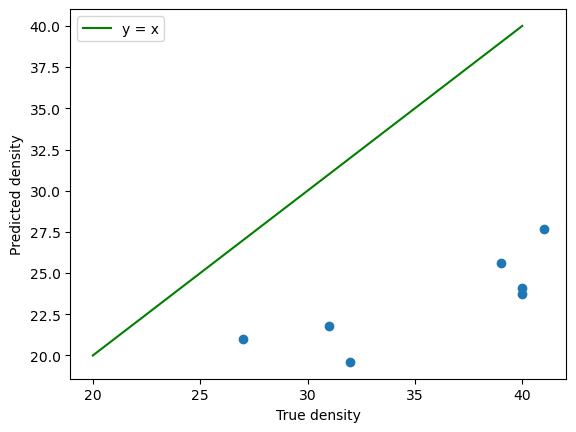

In [71]:
plt.scatter(block_0103_true_and_forecasted_values_df['True_count'], block_0103_true_and_forecasted_values_df['Forecasted_count'])
plt.xlabel("True density")
plt.ylabel("Predicted density")
# Add the y = x line
plt.plot([20, 40], [20, 40], color='green', label='y = x')
plt.legend()
plt.show()

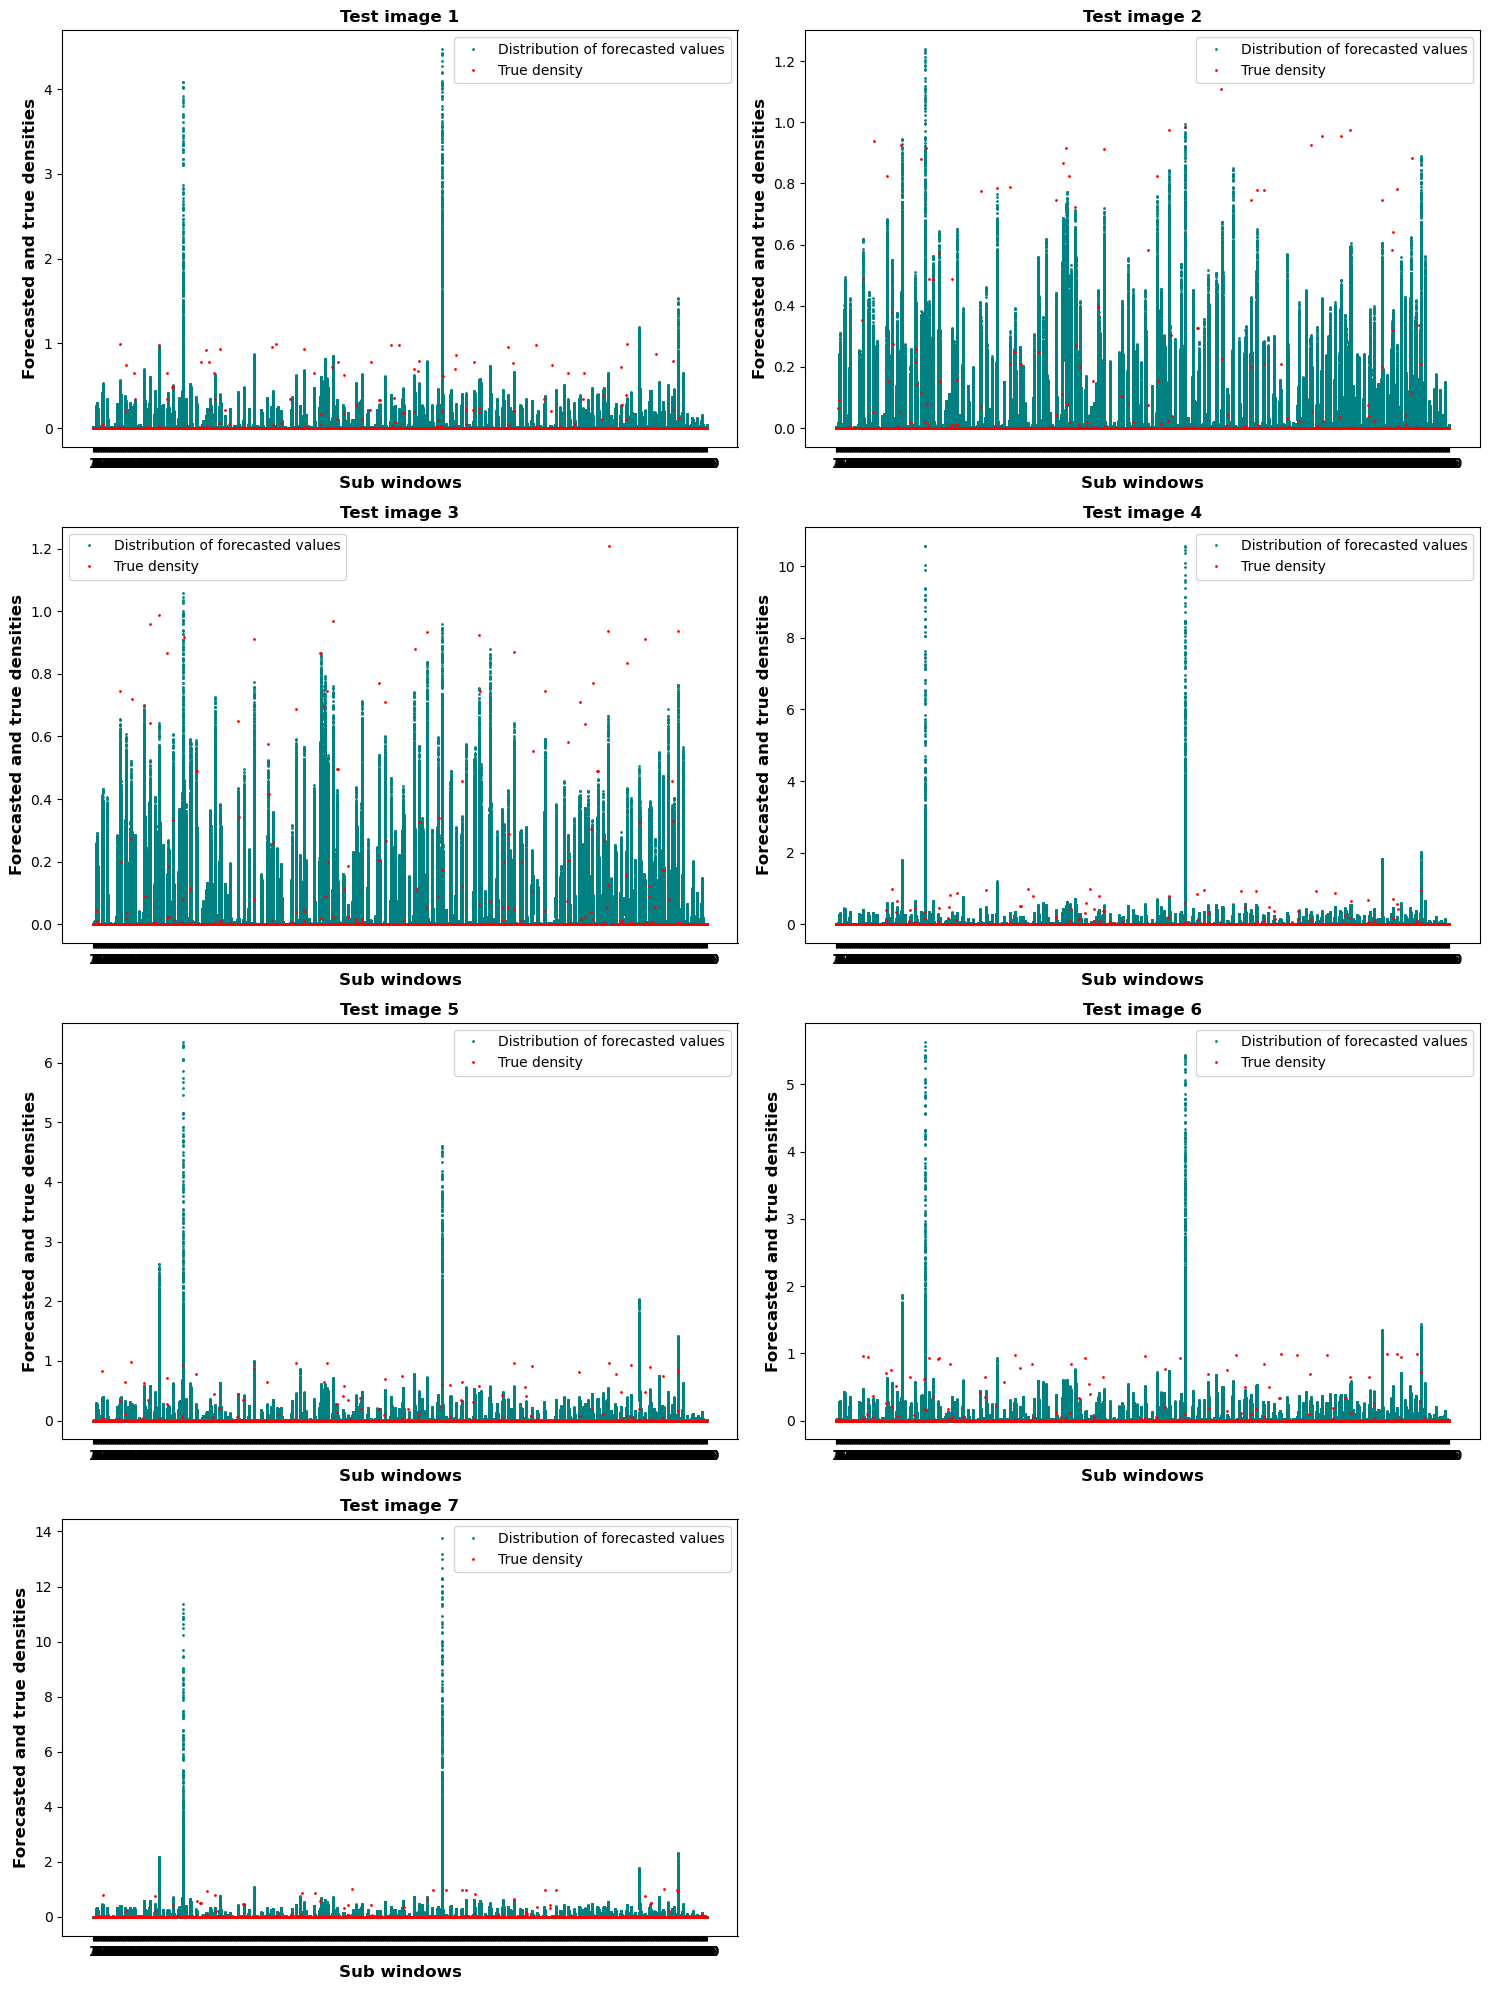

CPU times: user 27.5 s, sys: 741 ms, total: 28.2 s
Wall time: 27.9 s


In [72]:
%%time
# Create a 2x4 grid of subplots (total 8 plots, the last one will be left empty)
fig, axes = plt.subplots(4, 2, figsize=(15,20))
axes = axes.flatten() 

# widths plots
for i in range(7):
    timestep_i_subwindows = []
    for y, file in enumerate(loaded_npy_files):
        t_i_forecast = file[:,i]
        # print the shape of the extracted array
        # print(t_i_forecast.shape)
        timestep_i_subwindows.append(t_i_forecast)
    stacked_forecasts = np.stack(timestep_i_subwindows)
    stacked_forecasts[stacked_forecasts<0] = 0
    sorted_stacked_forecasts = np.sort(stacked_forecasts, axis = 1)
    # get the values between the 2.5th and 97.5th percentile?
    sorted_interval_data = sorted_stacked_forecasts[:,25:975]

    # Plot for the current 2D array
    for l, row in enumerate(sorted_interval_data):
        axes[i].plot([l + 1] * len(row), row, 'o', markersize=1, color='teal', label='Distribution of forecasted values' if l == 0 else "")
    
    true_counts = exp_true.iloc[i,:].values

    # # Overlay the 1D array values
    axes[i].plot(np.arange(1, 911), true_counts, 'o', markersize=1, color='red', label='True density')
    
    # Customize x-ticks and labels
    axes[i].set_xticks(np.arange(1, 911))
    # axes[i].set_xticklabels([f'sub_window_{zz + 1}' for zz in range(910)], rotation=90, fontsize=13)
    axes[i].set_xlabel("Sub windows", fontsize=12, fontweight='bold')
    axes[i].set_ylabel("Forecasted and true densities", fontsize=12, fontweight='bold')
    axes[i].set_title(f"Test image {i + 1}", fontsize=12, fontweight='bold')
    axes[i].legend()


# Hide the last (empty) subplot
axes[-1].set_visible(False)

# Adjust layout
plt.tight_layout()

# # Save the figure as a PDF file
# plt.savefig("Previous_data/Forecasted_distributions_blk13.pdf", format='pdf', bbox_inches='tight')
plt.show()



In [73]:
# plots are going to be too over-crowded as we now have 910 subwindows - might beed to talk to Dr. Ghosh to figure out a better way to give these plots